# Machine Learning Module Project - Supervised Learning 

### Assessment [ Total Score: 20 points ]

Please refer to the problem statement for questions and descriptions

### Attribute Information:
- Customer ID: unique Id
- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- Phoneservice: Whether the customer has a phone service or not (Yes, No)
- Multiplelines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- Internetservice: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- Streamingmovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- Paperlessbilling: Whether the customer has paperless billing or not (Yes, No)
- Paymentmethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- Monthlycharges: The amount charged to the customer monthly.
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

### 1. Import the data: [ Score: 3 point ]

- Import the required libraries
- Create a database in MYSQL server using MYSQL workbench and Import the datasets 'TelcomCustomerChurn1' and 'TelcomCustomerChurn2' in it.
- Connect to DB using mysql-connector-python package
- Import all the given datasets from MYSQL server. Explore shape and size. 
- Merge all datasets onto one and explore final shape and size.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import pymysql
import pymysql.cursors

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

    - Use MySQL server to fetch the data onto python

In [ ]:
# Connection setup
MYSQL_Connection = pymysql.connect(host='localhost',
                                   user='root',
                                   password='password',
                                   db='supervised_learning_project')

print(MYSQL_Connection)


# Import data from MY SQL server
df_1 = pd.read_sql('SELECT * FROM telcomcustomerchurn1', con=MYSQL_Connection)
df_2 = pd.read_sql('SELECT * FROM telcomcustomerchurn2', con=MYSQL_Connection)

print("Data 1:",df_1.shape)
print("\nData 2:",df_2.shape)

# Concatenate two dataframes
df_Original = pd.concat([df_1, df_2], axis=1, sort=False) 
df = df_Original.copy(deep=True) 
df.head()
print("\nConcatenated Data :",df.shape)

Data 1: (7043, 10)

Data 2: (7043, 12)

Concatenated Data : (7043, 22)


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
## Make a copy of the dataset will use it later for EDA
dfc = df.copy()# Backup the original data

### 2. Data cleansing and Exploratory Data Analysis: [ Score: 8 point ]

- Data Cleansing:
  - Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.
  - Check if there are any duplicate records in the dataset? If any drop them.
  - Drop the columns which you think redundant for the analysis.
  - Encode the categorical variables.
  - Write all the above steps in functions for modularity.

- Exploratory Data Analysis:
   - Perform detailed statistical analysis on the data.
   - Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

#### Data Cleansing:

In [ ]:
## checking the percentage of missing values.

def check_missing_values(df):
    '''Function to check the missing data percentage'''
    print("percentage of missing data of dataframe \n",df.isnull().sum()/len(df)*100)
    
check_missing_values(df)

percentage of missing data of dataframe 
 customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
customerID          0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [ ]:
## Checking if there are any duplicate entires.

def check_duplicate(df):
    duplicate=df[df.duplicated()]
    return duplicate

duplicate=check_duplicate(df)
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
## Dropping redundant columns

from colorama import Fore, Back, Style
print(Fore.GREEN+"\n\nDo you wish to drop any columns ? ",Fore.BLACK+"<yes> or <no>")
answer_drop=str(input())

if answer_drop=='yes':
    print(Fore.GREEN+"\nEnter the column names seprated by",Fore.BLACK+"<,>")
    print(Style.RESET_ALL)
    Drop_col=str(input())
    Trans = list(Drop_col.split(","))
    for i in range(len(Trans)):
        a=Trans[i]
        df = df.drop(Drop_col,axis=1)



Do you wish to drop any columns ?  <yes> or <no>
yes

Enter the column names seprated by <,>

customerID


In [ ]:
## Encoding categorical variables using label encoder

## select object datatype variables
object_type_variables = [i for i in df.columns if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


#### Exploratory data analysis:

In [ ]:
# Perform detailed statistical analysis on the data.

In [ ]:
# Use the copy of the data for the analysis

In [ ]:
## Let us check the statistical summary of the numerical variables
dfc.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [ ]:
## Let us check the statistical summary of the categorical variables
dfc.select_dtypes(include='O').describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,7043,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,7590-VHVEG,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,1,3088,3095,3473,2810,2785,3875,4171,2365,5174


- The average tenure of the customers is around 32 months.
- The maximum monthlycharges is around 118.75 and minimum is around 18.25
- The average totalcharges charged for the customers is around 2279.79
- There are 7043 unique customers.
- We can observe that there are 4 different PaymentMethods and 3 different InternetServices.

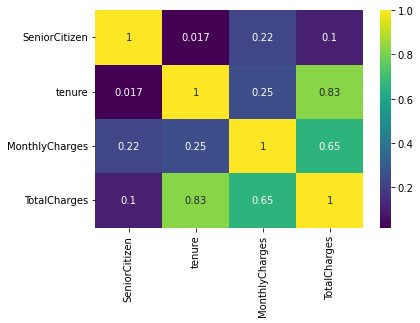

In [ ]:
sns.heatmap(dfc.corr(),annot=True,cmap='viridis')
plt.show()

- As we can observe from the above heatmap, The variables tenure and Totalcharges are having high positive correlation, we can say that as the tenure of a customer increases there is a significant increase in the totalcharges charged for a customer.
- And also the variables totalcharges and monthlycharges are having a high positive correlation.

In [ ]:
# Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

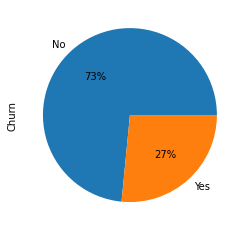

In [ ]:
# Visualizing Churn proportion
dfc['Churn'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

- We can observe that the 27% of the customers have churned. 
- Also, we can note that the target class is imbalanced. which means we have a much larger proportion of one specific class over another.

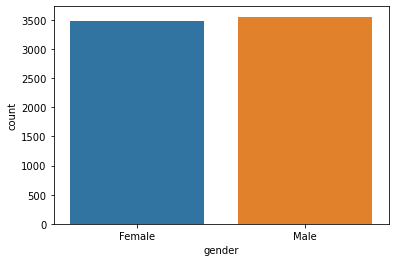

In [ ]:
# Lets check the gender distribution of the customers.
sns.countplot(dfc['gender'])
plt.show()

- As we can observed that there are almost equal number of male and female customers.

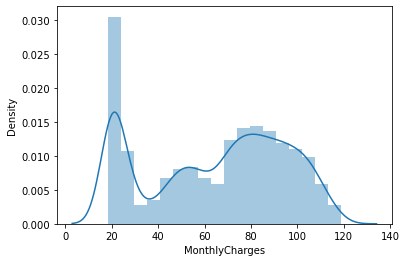

In [ ]:
# lets check the distribution of the column monthly charges and total charges.
sns.distplot(dfc['MonthlyCharges'])
plt.show()

- As we can observe from the above distribution plot of the monthlycharges is skewed towards left.

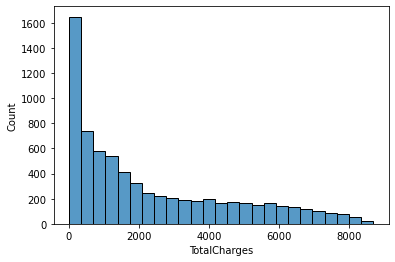

In [ ]:
sns.histplot(dfc['TotalCharges'])
plt.show()

- We can observe that there are more number of instances fall in the range of 0 to 2000.
- The column Totalcharges is skewed towards right.

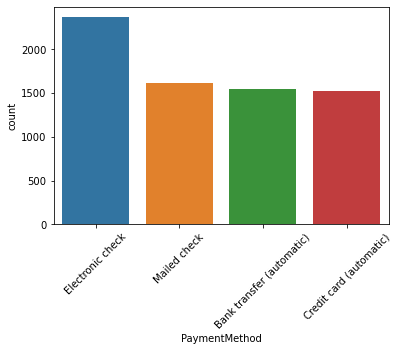

In [ ]:
## lets check the distribution of the different PaymentMethod.
sns.countplot(dfc['PaymentMethod'])
plt.xticks(rotation=45)
plt.show()

- We can observe that there are four different payment methods.
- Most of the customers use electronic check for payments.

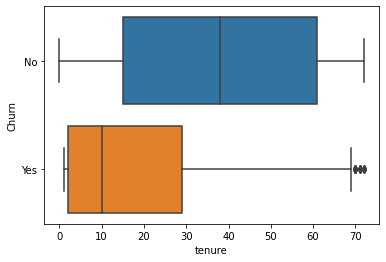

In [ ]:
# Visualizing how churn interacts with tenure
sns.boxplot(dfc['tenure'],dfc['Churn'])
plt.show()

- It's possible to conclude that 75% of clients who discontinue their subscriptions do so within the first 29 months of service. Half of them leave untill the 10th month, not even staying for a year as clients.

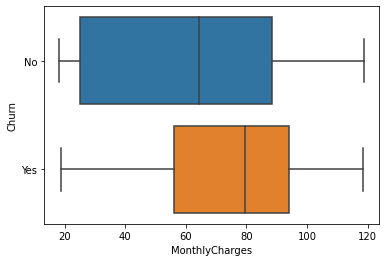

In [ ]:
# Visualizing relationship monthlycharges Vs tenure
sns.boxplot(dfc['MonthlyCharges'],dfc['Churn'])
plt.show()

- Through the boxplot above, it's clear to see that customers who leave are those who pay more monthly for their services!
- Averagely, the monthly cost for these clients was higher than the average cost for clients who stayed in the company! Even among the clients who paid less, the ones who left the company still paid more than those who stayed.

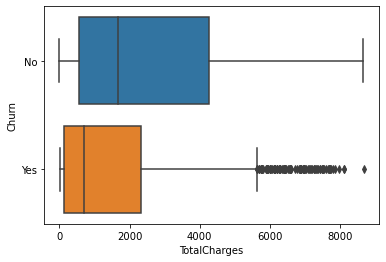

In [ ]:
# Visualizing relationship totalcharges Vs tenure
sns.boxplot(dfc['TotalCharges'],dfc['Churn'])
plt.show()

- Even though clients who leave the company pay more monthly, those who stay as clients end up with higher amounts of total charges. It isn't surprising, since they usually stay longer with us, so their total amount of payments will be higher than those who left the company much earlier.

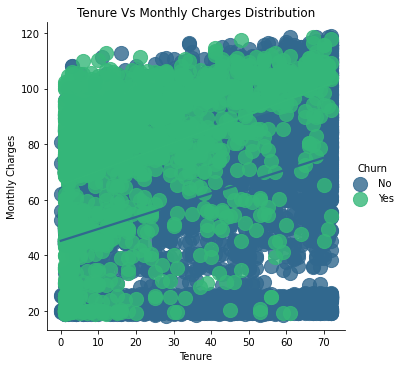

In [ ]:
## Lets check the relationship between tenure and the monthlycharges with respect to the target column Churn.
ax = sns.lmplot(height = 5, data = df, x = 'tenure', y = 'MonthlyCharges',
              hue = 'Churn', scatter_kws={'s': 200}, line_kws = None, palette = 'viridis')
ax.set(xlabel = 'Tenure', ylabel = 'Monthly Charges')
ax = plt.title('Tenure Vs Monthly Charges Distribution')

- We can observe a large concentration of clients who left the company in the upper left part of the plot above.
- Also, we can see a higher trendline for clients who left, confirming that they do have higher charges per month than those who stay.

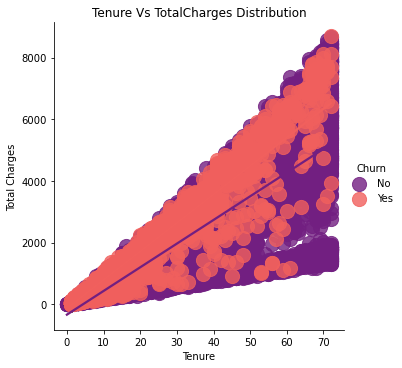

In [ ]:
## Lets check the relationship between tenure and the totalcharges with respect to the target column Churn.
ax = sns.lmplot(height = 5, data = df, x = 'tenure', y = 'TotalCharges',
              hue = 'Churn', scatter_kws={'s': 200}, line_kws = None, palette = 'magma')
ax.set(xlabel = 'Tenure', ylabel = 'Total Charges')
ax = plt.title('Tenure Vs TotalCharges Distribution')

- We can observe that the variables tenure and totalcharges are having a linear relationship.
- As the tenure increases the Totalcharges also increases.

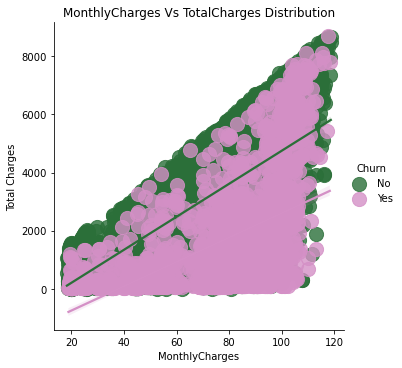

In [ ]:
## Lets check the relationship between MonthlyCharges and the totalcharges with respect to the target column Churn.
ax = sns.lmplot(height = 5, data = df, x = 'MonthlyCharges', y = 'TotalCharges',
              hue = 'Churn', scatter_kws={'s': 200}, line_kws = None, palette = 'cubehelix')
ax.set(xlabel = 'MonthlyCharges', ylabel = 'Total Charges')
ax = plt.title('MonthlyCharges Vs TotalCharges Distribution')

- As we can observe a linear relationship between the variables monthlycharges and totalcharges.
- There is a high concentration of the churned customers in the right middle part, which says that the customers who paid high monthly charges are more likely to be churned.

### 3. Data Preparation for model building: [ Score: 2 point ]

- Store the target column (i.e.Churn) in the y variable and the rest of the columns in the X variable
- Split the dataset into two parts (i.e. 70% train and 30% test).
- Standardize the columns using the z-score scaling approach

In [ ]:
# Data split: Independent vs target variable

X = df.drop(['Churn'],axis=1)  
y = df['Churn']                  

In [ ]:
## Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)  

## Scaling the data
ss = StandardScaler()
X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [ ]:
X_train.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1768,-0.999189,-0.440447,-0.971205,-0.661617,1.242334,0.330698,-0.994822,-1.179622,-0.912353,-1.028900,1.230888,-0.922965,-1.113972,1.141887,0.367913,-1.202263,-0.524973,-0.212682,0.535966
3556,1.000812,-0.440447,1.029648,1.511449,-1.075505,0.330698,-0.994822,1.539189,0.249595,0.104614,0.098113,0.235146,0.013493,0.014408,0.367913,-1.202263,1.357293,-1.515766,-0.958776


In [ ]:
X_test.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6418,1.000812,-0.440447,1.029648,-0.661617,-0.058909,0.330698,1.115536,-1.179622,-0.912353,-1.0289,1.230888,1.393257,1.140958,1.141887,0.367913,0.831765,1.357293,0.478852,0.086441
1948,-0.999189,-0.440447,-0.971205,-0.661617,-1.238161,0.330698,-0.994822,0.179783,-0.912353,-1.0289,-1.034663,-0.922965,-1.113972,1.141887,-0.829323,-1.202263,0.416160,0.527176,-0.938515


### 4. Model training and testing: [ Score: 6 point ]

- Train and test Logistic Regression, KNN and Naive Bayes classifier models taught in the learning module.
- Display the classification accuracies for train and test data.. 
- Display and compare all the models designed with their train and test accuracies.
- Select the final best trained model along with your detailed comments for selecting this model. 

In [ ]:
# Logistic Regression
LogR = LogisticRegression()
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_train)
LogR_Accuracy_Train = accuracy_score(y_true=y_train, y_pred=y_pred)
print("Train Accuracy : ", LogR_Accuracy_Train)

y_pred = LogR.predict(X_test)
LogR_Accuracy_Test = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Test Accuracy : ", LogR_Accuracy_Test)

Train Accuracy :  0.8060851926977688
Test Accuracy :  0.8012304779933743


In [ ]:
# NB - Find the best NBs kernels

k=[BernoulliNB,GaussianNB]
for i in range (len(k)):
    NB_Classifier = k[i]()
    NB_Classifier.fit(X_train, y_train)
    print ('kernel is =',k[i], '\tScore=',NB_Classifier.score(X_test, y_test))

kernel is = <class 'sklearn.naive_bayes.BernoulliNB'> 	Score= 0.7434926644581165
kernel is = <class 'sklearn.naive_bayes.GaussianNB'> 	Score= 0.7453857075248462


In [ ]:
# NB - Model

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NB = GaussianNB()
NB.fit(X_train, y_train)

y_pred = NB.predict(X_train)
NB_Accuracy_Train=accuracy_score(y_train, y_pred, normalize = True)
print("Train Accuracy: ", NB_Accuracy_Train)

y_pred = NB.predict(X_test)
NB_Accuracy_Test=accuracy_score(y_test, y_pred, normalize = True)
print("Test Accuracy : ", NB_Accuracy_Test)

Train Accuracy:  0.7600405679513185
Test Accuracy :  0.7453857075248462


In [ ]:
# KNN - choosing the K value

# creating odd list of K for KNN
myList = list(range(2,20))  # k=arange(1,20,2)

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 19


In [ ]:
# KNN - Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=19)
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_train)
KNN_Accuracy_Train=accuracy_score(y_train, y_pred)
print("Train Accuracy : ", KNN_Accuracy_Train)

y_pred = KNN.predict(X_test)
KNN_Accuracy_Test=accuracy_score(y_test, y_pred)
print("Test Accuracy : ", KNN_Accuracy_Test)

Train Accuracy :  0.8002028397565923
Test Accuracy :  0.7657359204921912


In [ ]:
# Comparison table

Comparison1 = pd.DataFrame({'Method':['Logistic Regression'], 'Train accuracy': LogR_Accuracy_Train, 
                           'Test accuracy': LogR_Accuracy_Test})
Comparison1 = Comparison1[['Method', 'Train accuracy', 'Test accuracy']]


Comparison2 = pd.DataFrame({'Method':['Naive Bayes Regression'], 'Train accuracy': NB_Accuracy_Train, 
                           'Test accuracy': NB_Accuracy_Test},)
Comparison2 = Comparison2[['Method', 'Train accuracy', 'Test accuracy']]


Comparison3 = pd.DataFrame({'Method':['KNN'], 'Train accuracy': KNN_Accuracy_Train, 
                           'Test accuracy': KNN_Accuracy_Test})
Comparison3 = Comparison3[['Method', 'Train accuracy', 'Test accuracy']]



Comparison = pd.concat([Comparison1, Comparison2,Comparison3])

Comparison

,Method,Train accuracy,Test accuracy
0,Logistic Regression,0.806085,0.801230
0,Naive Bayes Regression,0.760041,0.745386
0,KNN,0.800203,0.765736


### 5. Conclusion and improvisation: [ Score: 1 point ]


- Exploratory data analysis made it possible for us to draw a profile of clients that discontinue their subscriptions and the kind of services and contracts they usually sign for, which helps the company to make specific improvements and develop strategies to retain these clients.
- We have explored the variables with respect to the subcription charges for the customers and inferred that the charges were a very important variable whether the customer is going to stay or churn.
- The Company has pay more focus on the subscription charges for the customers and giving certain discounts and offers and promote their business and can make the customers retain with them.
- We have build 3 different classification models, the logistic regression model is giving us the best accuracy score for training and testing with a balanced results.
- Where as KNN model giving us the good accuarcy for the training but the accuracy is decreased when it comes to testing.
- Please note, we have seen that the target class is imbalanced so, we can further go with evaluating the models based on the different performance metrics such as presicion, recall and F1score and choose the model accordingly.
- Also, we can tune the hyperparameters and find the best set of hyperparameters will increase the classification accuracy of the model.

### Happy Learning :)

     ©Great Learning. Proprietary content. All Rights Reserved. Unauthorised use or distribution prohibited